# Fed-Batch Bioreactor

Batch reactors are commonly used in the production of speciality chemicals, pharmaceuticals, and beverage and food products. 

## Model Development

Mass balances for a fed-batch bioreactor are given by

$$\begin{align*}
\frac{d(XV)}{dt} & = V r_g(X,S) \\
\frac{d(PV)}{dt} & = V r_P(X,S) \\
\frac{d(SV)}{dt} & = F S_f - \frac{1}{Y_{X/S}}V r_g(X,S)
\end{align*}$$

where $X$ is cell concentration, $P$ is product concentration, and $S$ is substrate concentration, all given in units of grams/liter. 

The reactor is fed with fresh substrate at concentration $S_f$ and flowrate $F(t)$ in liters per hour. The volume is therefore changing 

$$\frac{dV}{dt} = F(t)$$

Rate $r_g(X,S)$ is the production of fresh cell biomass in units of grams/liter/hr. The cell specific growth is expressed as

$$r_g(X,S) = \mu(S)X$$

where $\mu(S)$ is the cell specific growth rate. In the Monod model, the specific growth rate is a function of substrate concentration given by

$$\mu(S) = \mu_{max}\frac{S}{K_S + S}$$

where $\mu_{max}$ is the maximum specific growth rate, and $K_S$ is the half saturation constant which is the value of $S$ for which $\mu = \frac{1}{2}\mu_{max}$.

For this model, the product is assumed to be a by-product of cell growth

$$r_P(X,S) = Y_{P/X}r_g(X,S)$$

where $Y_{P/X}$ is the product yield coefficient defined as

$$Y_{P/X} = \frac{\mbox{mass of product formed}}{\mbox{mass of new cells formed}}$$

The model further assumes that substrate is consumed is proportion to the mass of new cells formed where $Y_{X/S}$ is the yield coefficient for new cells

$$Y_{P/X} = \frac{\mbox{mass of new cells formed}}{\mbox{mass of substrate consumed}}$$

### Dilution Effect

One aspect of the fed-batch model is that volume is not constant, therefore the cell, product, and substrate concentrations are subject to a dilution effect.  Mathematically, the chain rule of differential calculus provides a means to recast the state of model in terms of the intensive concentration variables $X$, $P$, and $S$, and extensive volume $V$.

$$\begin{align*}
\frac{d(XV)}{dt} & = V\frac{dX}{dt} + X\frac{dV}{dt} = V\frac{dX}{dt} + F(t)X \\
\frac{d(PV)}{dt} & = V\frac{dP}{dt} + P\frac{dV}{dt} = V\frac{dP}{dt} + F(t)P \\
\frac{d(SV)}{dt} & = V\frac{dS}{dt} + S\frac{dV}{dt} = V\frac{dS}{dt} + F(t)S
\end{align*}$$

Rearranging and substituting into the mass balances gives

$$\begin{align*}
\frac{dX}{dt} & = - \frac{F(t)}{V}X + r_g(X,S)  \\
\frac{dP}{dt} & = - \frac{F(t)}{V}P + r_P(X,S) \\
\frac{dS}{dt} & = \frac{F(t)}{V}(S_f - S) - \frac{1}{Y_{X/S}}r_g(X,S) \\
\frac{dV}{dt} & = F(t)
\end{align*}$$

## Python Implementation

In [4]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp

# parameter values
mumax = 0.20      # 1/hour
Ks = 1.00         # g/liter
Yxs = 0.5         # g/g
Ypx = 0.2         # g/g
Sf = 10.0         # g/liter

# inlet flowrate
def F(t):
    return 0.05

# reaction rates
def mu(S):
    return mumax*S/(Ks + S)

def Rg(X,S):
    return mu(S)*X
    
def Rp(X,S):
    return Ypx*Rg(X,S)

# differential equations
def deriv(t, y):
    X, P, S, V = y
    dX = -F(t)*X/V + Rg(X,S)
    dP = -F(t)*P/V + Rp(X,S)
    dS = F(t)*(Sf - S)/V - Rg(X,S)/Yxs
    dV = F(t)
    return [dX, dP, dS, dV]

## Simulation

<AxesSubplot:xlabel='Time'>

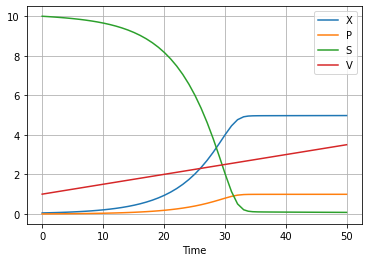

In [17]:
IC = [0.05, 0.0, 10.0, 1.0]
t_final = 50

soln = solve_ivp(deriv, [0, t_final], IC, max_step=1.0)
df = pd.DataFrame(soln.y.T, columns=["X", "P", "S", "V"])
df["Time"] = soln.t

df.plot(x = "Time", grid=True)